In [10]:
%pip install pandas numpy scikit-learn pyarrow fastparquet seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Carregar os landmarks e rótulos do arquivo .parquet
landmarks_df = pd.read_parquet('/home/viniciuss/Documents/projetos/FER-2013_emotion_detection/landmarks_balanced.parquet')

# Exibir as primeiras linhas do DataFrame para verificar
print("Primeiras linhas do DataFrame:")
print(landmarks_df.head())

Primeiras linhas do DataFrame:
          0         1         2         3         4         5         6  \
0  0.472929  0.108026 -0.096545  0.487427  0.744526 -0.063673  0.491937   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.541084  0.090272 -0.202697  0.415552  0.743037 -0.027397  0.417169   
3  0.401947  0.095812  0.050275  0.439855  0.519766 -0.095676  0.441034   
4  0.482213 -0.028750  0.233275  0.307742  0.470724 -0.186355  0.305069   

          7         8         9  ...       234       235       236       237  \
0  0.754510 -0.052142  0.497172  ...  0.609163  0.517466 -0.043466  0.586827   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.749365 -0.014516  0.418514  ...  0.563374  0.576412 -0.068077  0.540626   
3  0.531501 -0.090365  0.442589  ...  0.513090  0.373420 -0.026002  0.492152   
4  0.480774 -0.182103  0.304470  ...  0.488981  0.325623 -0.053332  0.464347   

        238       239       240      

In [4]:
# Separar features e targets
X = landmarks_df.drop('label', axis=1).values
y = landmarks_df['label'].values

# Dividir dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar as features se necessário (dependendo do modelo utilizado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras")

Tamanho do conjunto de treino: 12265 amostras
Tamanho do conjunto de teste: 3067 amostras


# Treinamentos SVC, LDA e RFC

In [5]:
# Inicializar o classificador SVC
svc = SVC(random_state=42)

# Treinar o modelo
svc.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred_svc = svc.predict(X_test_scaled)

# Avaliar o desempenho
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Acurácia do SVC: {accuracy_svc:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação do SVC:")
print(classification_report(y_test, y_pred_svc))

Acurácia do SVC: 0.62

Relatório de Classificação do SVC:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       767
           1       0.52      0.48      0.50       766
           2       0.73      0.73      0.73       767
           3       0.76      0.74      0.75       767

    accuracy                           0.62      3067
   macro avg       0.63      0.62      0.62      3067
weighted avg       0.63      0.62      0.62      3067



In [6]:
# Inicializar o LDA
lda = LinearDiscriminantAnalysis()

# Treinar o modelo
lda.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred_lda = lda.predict(X_test_scaled)

# Avaliar o desempenho
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"Acurácia do LDA: {accuracy_lda:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação do LDA:")
print(classification_report(y_test, y_pred_lda))

Acurácia do LDA: 0.71

Relatório de Classificação do LDA:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       767
           1       0.63      0.62      0.63       766
           2       0.82      0.80      0.81       767
           3       0.81      0.81      0.81       767

    accuracy                           0.71      3067
   macro avg       0.71      0.71      0.71      3067
weighted avg       0.71      0.71      0.71      3067



In [7]:
# Inicializar o RFC
rfc = RandomForestClassifier(random_state=42)

# Treinar o modelo
rfc.fit(X_train_scaled, y_train)

# Prever no conjunto de teste
y_pred_rfc = rfc.predict(X_test_scaled)

# Avaliar o desempenho
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Acurácia do RFC: {accuracy_rfc:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação do RFC:")
print(classification_report(y_test, y_pred_rfc))

Acurácia do RFC: 0.58

Relatório de Classificação do RFC:
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       767
           1       0.50      0.48      0.49       766
           2       0.70      0.73      0.71       767
           3       0.63      0.65      0.64       767

    accuracy                           0.58      3067
   macro avg       0.58      0.58      0.58      3067
weighted avg       0.58      0.58      0.58      3067



# Tabelas

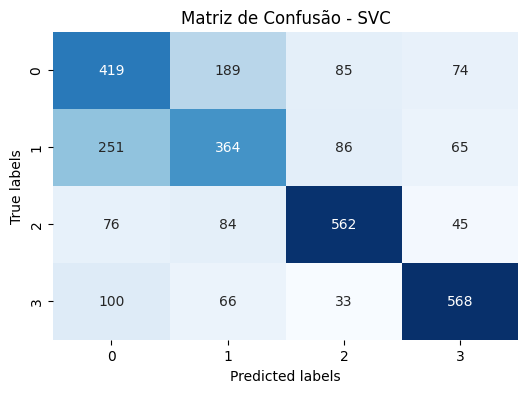

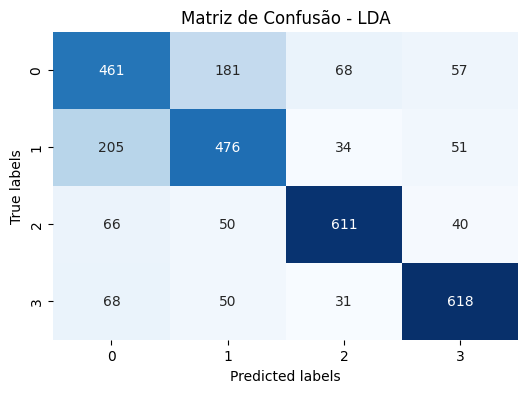

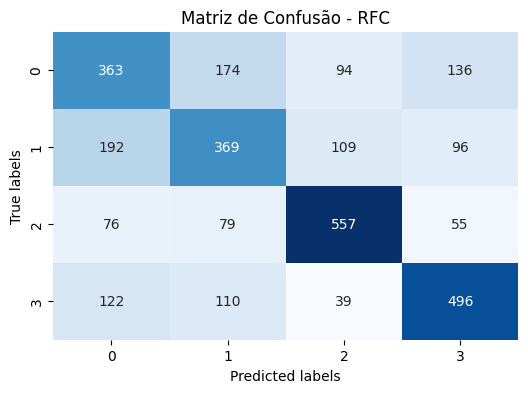

In [13]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

# Matriz de confusão para SVC
plot_confusion_matrix(y_test, y_pred_svc, 'Matriz de Confusão - SVC')

# Matriz de confusão para LDA
plot_confusion_matrix(y_test, y_pred_lda, 'Matriz de Confusão - LDA')

# Matriz de confusão para RFC
plot_confusion_matrix(y_test, y_pred_rfc, 'Matriz de Confusão - RFC')

# Salvando

In [9]:
lda_model_path = '/home/viniciuss/Documents/projetos/FER-2013_emotion_detection/lda_model.pkl'

# Salvar o modelo LDA treinado
with open(lda_model_path, 'wb') as file:
    pickle.dump(lda, file)

print(f"Modelo LDA salvo em {model_path}")

svc_model_path = '/home/viniciuss/Documents/projetos/FER-2013_emotion_detection/svc_model.pkl'
with open(svc_model_path, 'wb') as file:
    pickle.dump(svc, file)

print(f"Modelo SVC salvo em {svc_model_path}")

# Salvando o modelo RFC treinado
rfc_model_path = '/home/viniciuss/Documents/projetos/FER-2013_emotion_detection/rfc_model.pkl'
with open(rfc_model_path, 'wb') as file:
    pickle.dump(rfc, file)

print(f"Modelo RFC salvo em {rfc_model_path}")

Modelo LDA salvo em /home/viniciuss/Documents/projetos/FER-2013_emotion_detection/lda_model.pkl
Modelo SVC salvo em /home/viniciuss/Documents/projetos/FER-2013_emotion_detection/svc_model.pkl
Modelo RFC salvo em /home/viniciuss/Documents/projetos/FER-2013_emotion_detection/rfc_model.pkl
